In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("undersampled_data.csv")
df

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantState,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,OH,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,CA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,TX,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,MI,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,NY,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,$193.24,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,51694.676895,5921.0,Yes
1740,1999.0,3.0,2020.0,1.0,26.0,$221.96,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.000000,5300.0,Yes
1741,1999.0,3.0,2020.0,1.0,26.0,$26.69,Swipe Transaction,Abrils Wholesale,Saint Louis,MO,63146.000000,5300.0,Yes
1742,1999.0,3.0,2020.0,1.0,26.0,$103.95,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,MO,63146.000000,5812.0,Yes


In [3]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['UseChip', 'MerchantName', 'MerchantCity', 'MerchantState','target']
for i in col:
    df[i] = le.fit_transform(df[i]).astype(int)

In [5]:
independent=df[['User', 'Card', 'Year', 'Month', 'Day','UseChip','Amount',
       'MerchantName', 'MerchantCity', 'MerchantState', 'Zip', 'MCC']]

dependent=df[['target']]
independent

,User,Card,Year,Month,Day,UseChip,Amount,MerchantName,MerchantCity,MerchantState,Zip,MCC
0,1750.0,0.0,2015.0,7.0,16.0,2,21.42,383,522,45,44883.000000,7832.0
1,1959.0,1.0,2016.0,5.0,5.0,0,76.99,318,270,6,93535.000000,5300.0
2,182.0,2.0,2012.0,11.0,23.0,2,2.19,529,230,55,77096.000000,5411.0
3,458.0,2.0,2019.0,5.0,15.0,0,45.73,529,171,31,48532.000000,5411.0
4,1949.0,0.0,2018.0,1.0,4.0,0,1.25,153,68,44,11213.000000,5499.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,2,193.24,422,520,18,51694.676895,5921.0
1740,1999.0,3.0,2020.0,1.0,26.0,2,221.96,10,471,33,63146.000000,5300.0
1741,1999.0,3.0,2020.0,1.0,26.0,2,26.69,10,471,33,63146.000000,5300.0
1742,1999.0,3.0,2020.0,1.0,26.0,0,103.95,160,471,33,63146.000000,5812.0


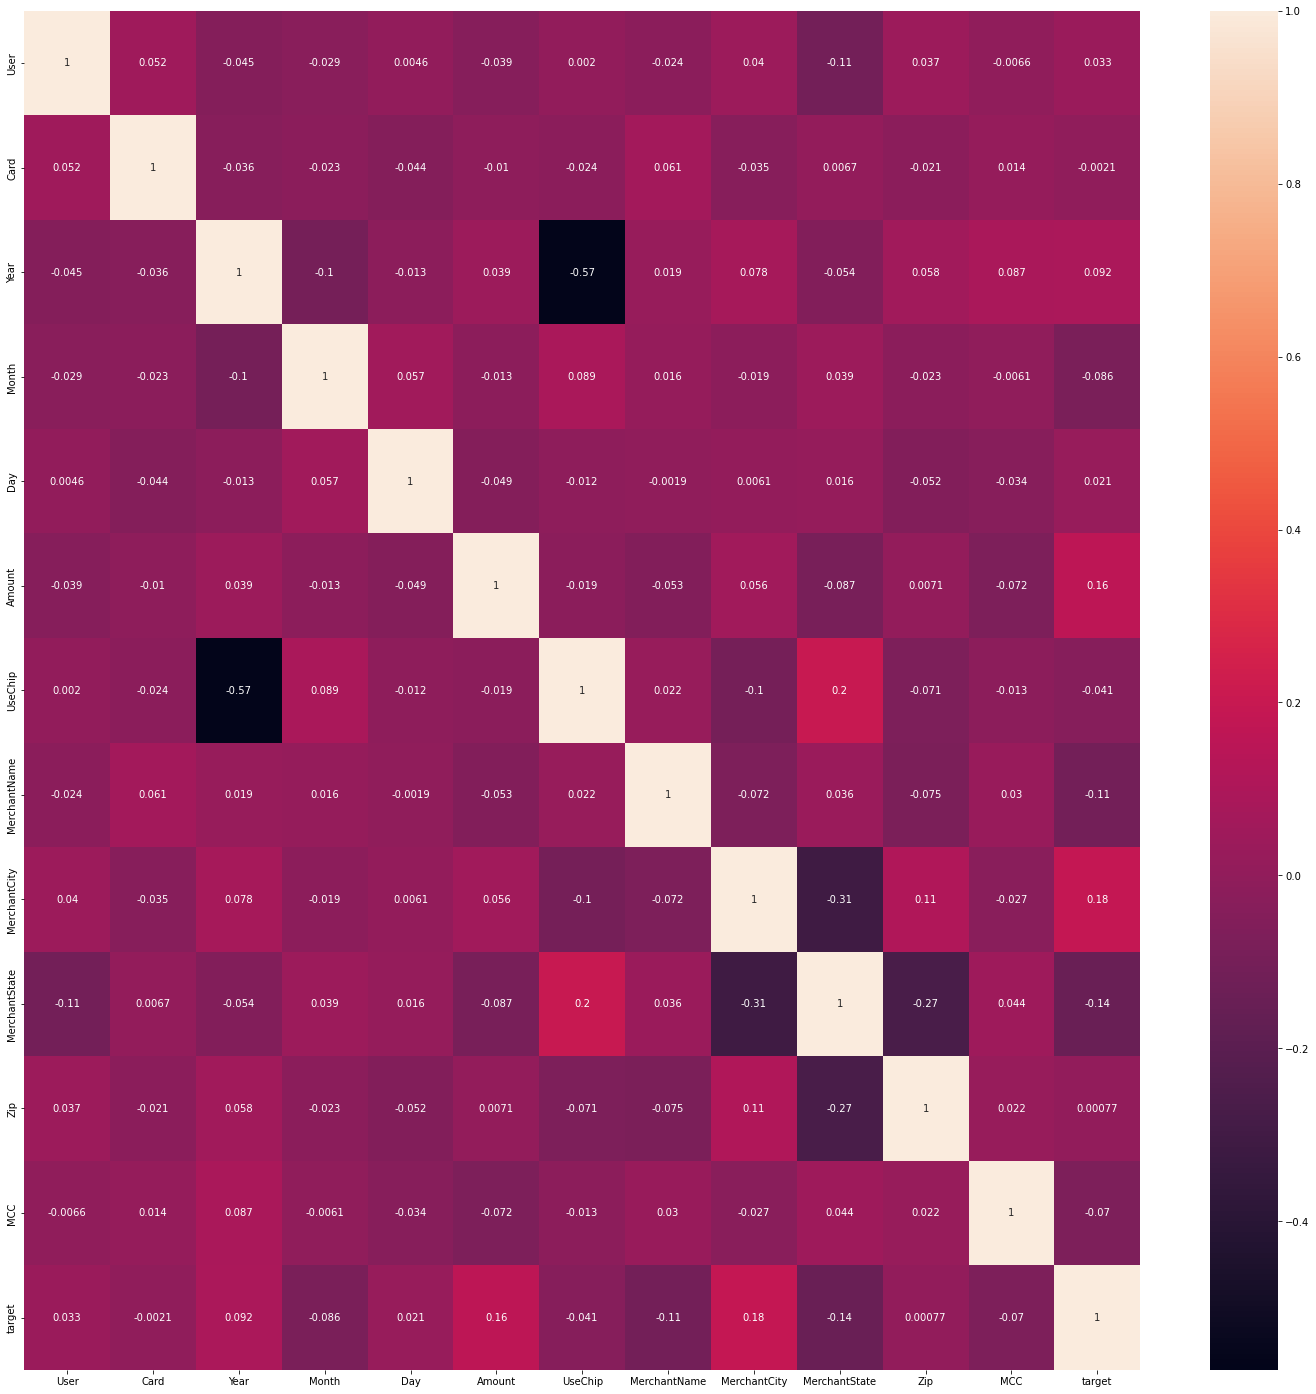

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

In [7]:
cor=df.corr()
cor_target=abs(cor["target"])
relevant_features=cor_target[cor_target>0.06]
print(relevant_features)

Year             0.091520
Month            0.086224
Amount           0.162054
MerchantName     0.107166
MerchantCity     0.184879
MerchantState    0.144218
MCC              0.070231
target           1.000000
Name: target, dtype: float64


In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Create the ExtraTreesClassifier model
model = ExtraTreesClassifier()

# Fit the model on your data
model.fit(independent, dependent)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for i, index in enumerate(sorted_indices):
    print(f"{i + 1}. Feature: {independent.columns[index]} - Importance: {importances[index]}")


C:\Users\Revathi\AppData\Local\Temp\ipykernel_10892\3717113983.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(independent, dependent)


1. Feature: Zip - Importance: 0.2430072964518037
2. Feature: MerchantCity - Importance: 0.13039639379352227
3. Feature: MerchantState - Importance: 0.13021341039569392
4. Feature: Year - Importance: 0.10625572977624247
5. Feature: MCC - Importance: 0.07393188082148916
6. Feature: MerchantName - Importance: 0.06896238284567219
7. Feature: Month - Importance: 0.049845752435479576
8. Feature: Amount - Importance: 0.04914152957543722
9. Feature: UseChip - Importance: 0.041164111428925045
10. Feature: Day - Importance: 0.038661547264360684
11. Feature: User - Importance: 0.03624963887980948
12. Feature: Card - Importance: 0.032170326331564386
